In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4625924    0:00.0
1     12     4625924    0:00.0
2     18     4625924    0:00.0
3     24     4625924    0:00.0
20    126    217824.6   0:00.0
40    246    217824.6   0:00.0
60    366    211049.3   0:00.0
80    486    211045.5   0:00.0
100   606    211045.5   0:00.0
120   726    211045.5   0:00.1
140   846    211045.5   0:00.1
160   966    211045.5   0:00.1
180   1086   211045.5   0:00.1
200   1206   211045.5   0:00.1
220   1326   211045.5   0:00.1
240   1446   211045.5   0:00.1
260   1566   211045.5   0:00.1
280   1686   211045.5   0:00.1
300   1806   211045.5   0:00.1
320   1926   211045.5   0:00.1
340   2046   211045.5   0:00.2
360   2166   211045.5   0:00.2
375   2250   211045.5   0:00.2
Halting: No significant change for 200 iterations.
Score at true solution: 
228525.36893801915
Found solution:          True paramet

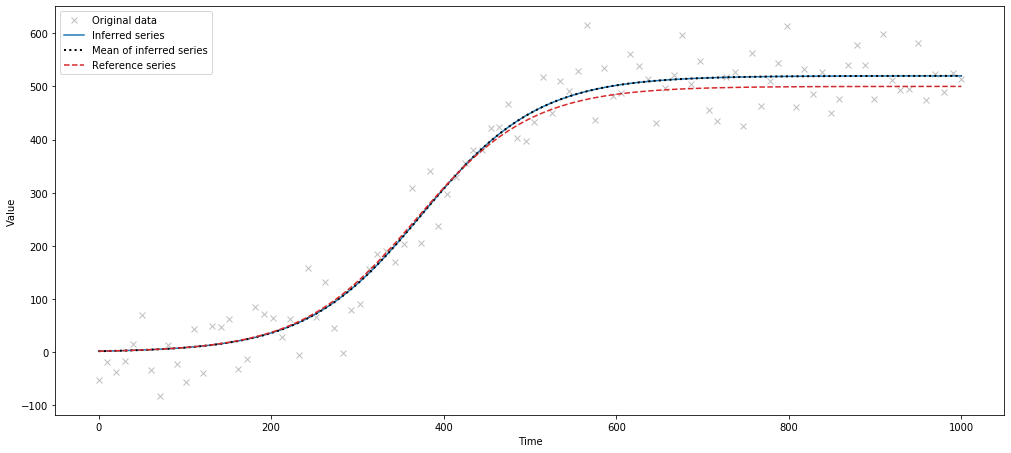

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

TypeError: Invalid shape (1, 1, 100) for image data

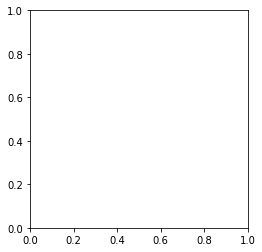

In [3]:
from pints.residuals_diagnostics import plot_residuals_distance

# Plot the autocorrelation
fig = plot_residuals_distance(np.array([found_parameters]),
                                     problem)

plt.show()